In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
sudan = xr.open_mfdataset('/home/linda/Desktop/Sudan/*.nc')
sudan

<xarray.Dataset>
Dimensions:   (lon: 69, lat: 56, datetime: 4748)
Coordinates:
  * lon       (lon) float32 21.75 22.0 22.25 22.5 ... 38.0 38.25 38.5 38.75
  * lat       (lat) float32 22.5 22.25 22.0 21.75 21.5 ... 9.5 9.25 9.0 8.75
  * datetime  (datetime) datetime64[ns] 2010-01-01 2010-01-02 ... 2022-12-31
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime, lat, lon) float32 dask.array<chunksize=(365, 56, 69), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [4]:
sudan_data = sudan.sel(datetime=slice("2010","2019"),lon=(30.75),lat=(12.75))
sudan_data

<xarray.Dataset>
Dimensions:   (datetime: 3652)
Coordinates:
    lon       float32 30.75
    lat       float32 12.75
  * datetime  (datetime) datetime64[ns] 2010-01-01 2010-01-02 ... 2019-12-31
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime) float32 dask.array<chunksize=(365,), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [5]:
sudan_precip = sudan_data['precip']
sudan_precip

<xarray.DataArray 'precip' (datetime: 3652)>
dask.array<getitem, shape=(3652,), dtype=float32, chunksize=(366,), chunktype=numpy.ndarray>
Coordinates:
    lon       float32 30.75
    lat       float32 12.75
  * datetime  (datetime) datetime64[ns] 2010-01-01 2010-01-02 ... 2019-12-31
Attributes:
    grid_mapping:  crs

In [6]:
# Question 1

monthly_rainfall_totals = sudan_precip.resample(datetime='1M').sum('datetime')
monthly_rainfall_totals

,Array,Chunk
Bytes,480 B,4 B
Shape,"(120,)","(1,)"
Count,769 Tasks,120 Chunks
Type,float32,numpy.ndarray


In [7]:
monthly_climatology = monthly_rainfall_totals.groupby('datetime.month').mean()
monthly_climatology

<xarray.DataArray 'precip' (month: 12)>
dask.array<stack, shape=(12,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lon      float32 30.75
    lat      float32 12.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [8]:
#Question 2

annual_total = sudan_precip.resample(datetime='1Y').sum()
annual_total

<xarray.DataArray 'precip' (datetime: 10)>
dask.array<stack, shape=(10,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * datetime  (datetime) datetime64[ns] 2010-12-31 2011-12-31 ... 2019-12-31
    lon       float32 30.75
    lat       float32 12.75

In [9]:
sudan_annual_average = annual_total.groupby('datetime.month').mean()
sudan_annual_average

<xarray.DataArray 'precip' (month: 1)>
dask.array<stack, shape=(1,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lon      float32 30.75
    lat      float32 12.75
  * month    (month) int64 12

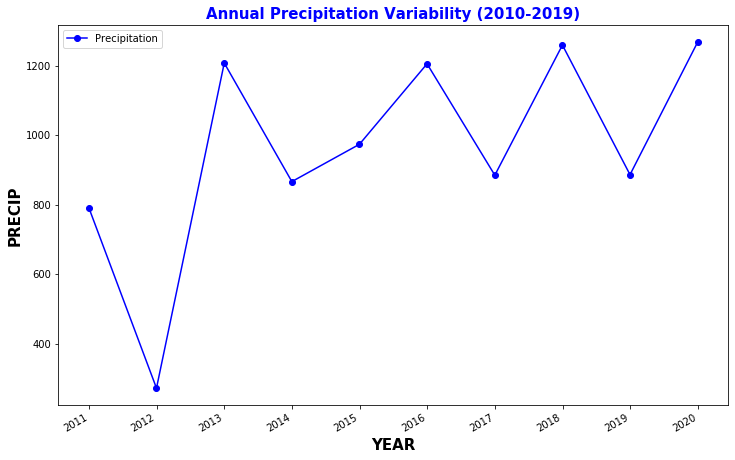

In [10]:
fig, ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
annual_total.plot(color = 'blue', lw = 1.5, marker = 'o', markersize = '6',label='Precipitation')
ax.set_title('Annual Precipitation Variability (2010-2019)',fontweight = 'bold', fontsize = 15,color = 'blue')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color = 'black')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 15,color = 'black')
plt.legend()
plt.show()

In [68]:
sudan_RR_1 = xr.open_mfdataset('/home/linda/Desktop/Sudan/*.nc')
sudan_RR_1

<xarray.Dataset>
Dimensions:   (lon: 69, lat: 56, datetime: 4748)
Coordinates:
  * lon       (lon) float32 21.75 22.0 22.25 22.5 ... 38.0 38.25 38.5 38.75
  * lat       (lat) float32 22.5 22.25 22.0 21.75 21.5 ... 9.5 9.25 9.0 8.75
  * datetime  (datetime) datetime64[ns] 2010-01-01 2010-01-02 ... 2022-12-31
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime, lat, lon) float32 dask.array<chunksize=(365, 56, 69), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [69]:
sudan_precip1 = sudan_RR_1['precip']
sudan_precip1

<xarray.DataArray 'precip' (datetime: 4748, lat: 56, lon: 69)>
dask.array<concatenate, shape=(4748, 56, 69), dtype=float32, chunksize=(366, 56, 69), chunktype=numpy.ndarray>
Coordinates:
  * lon       (lon) float32 21.75 22.0 22.25 22.5 ... 38.0 38.25 38.5 38.75
  * lat       (lat) float32 22.5 22.25 22.0 21.75 21.5 ... 9.5 9.25 9.0 8.75
  * datetime  (datetime) datetime64[ns] 2010-01-01 2010-01-02 ... 2022-12-31
Attributes:
    grid_mapping:  crs

In [70]:
ds = sudan_precip1
dry_days_per_year = (ds < 1).groupby('datetime.year').sum(dim='datetime')
dry_days_per_year

<xarray.DataArray 'precip' (year: 13, lat: 56, lon: 69)>
dask.array<stack, shape=(13, 56, 69), dtype=int64, chunksize=(1, 56, 69), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 21.75 22.0 22.25 22.5 22.75 ... 38.0 38.25 38.5 38.75
  * lat      (lat) float32 22.5 22.25 22.0 21.75 21.5 ... 9.75 9.5 9.25 9.0 8.75
  * year     (year) int64 2010 2011 2012 2013 2014 ... 2018 2019 2020 2021 2022

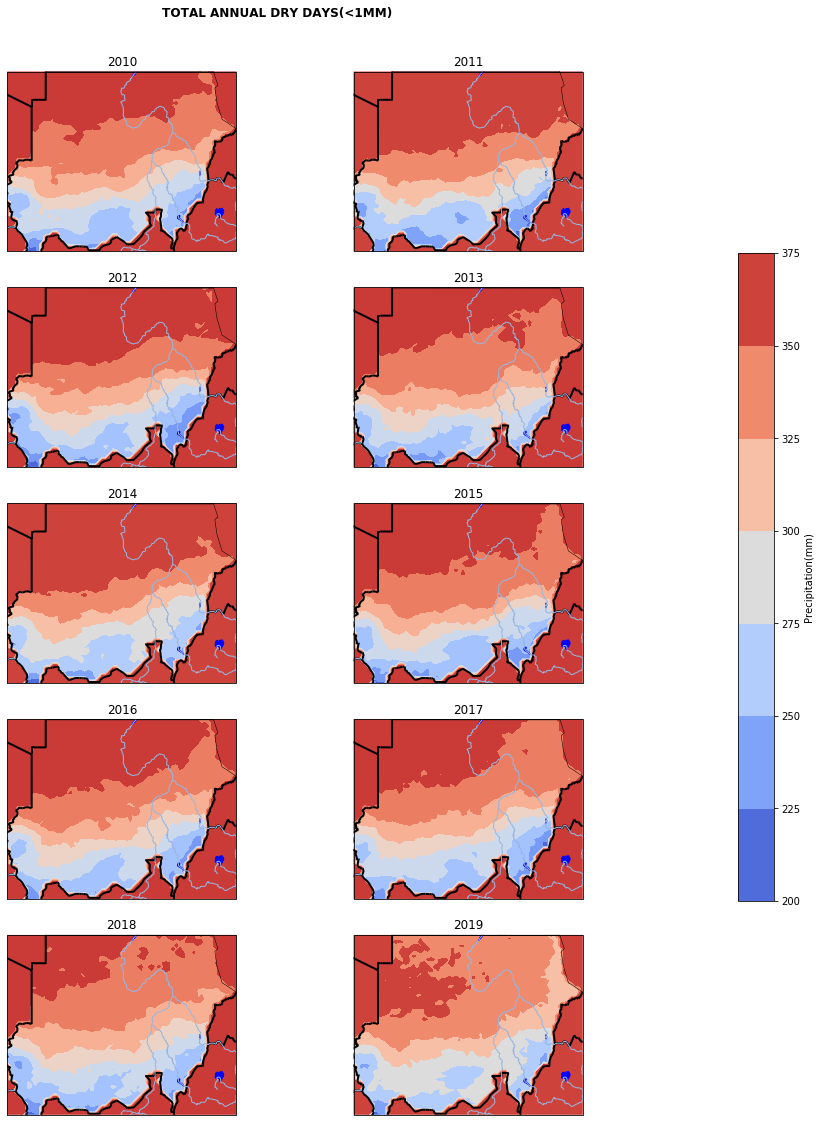

In [71]:
fig,ax=plt.subplots(5,2,figsize=(20,18),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([22.25,38.5,9.25,22.0], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(dry_days_per_year.lon,dry_days_per_year.lat,dry_days_per_year[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('TOTAL ANNUAL DRY DAYS(<1MM)', fontweight='bold');


In [72]:
ws = sudan_precip1
wet_days_per_year = (ws >= 1).groupby('datetime.year').sum(dim='datetime')
wet_days_per_year

<xarray.DataArray 'precip' (year: 13, lat: 56, lon: 69)>
dask.array<stack, shape=(13, 56, 69), dtype=int64, chunksize=(1, 56, 69), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 21.75 22.0 22.25 22.5 22.75 ... 38.0 38.25 38.5 38.75
  * lat      (lat) float32 22.5 22.25 22.0 21.75 21.5 ... 9.75 9.5 9.25 9.0 8.75
  * year     (year) int64 2010 2011 2012 2013 2014 ... 2018 2019 2020 2021 2022

In [73]:
wet_days_per_month1= (ws>1).groupby('datetime.month').sum(dim='datetime')
wet_days_per_month1

<xarray.DataArray 'precip' (month: 12, lat: 56, lon: 69)>
dask.array<stack, shape=(12, 56, 69), dtype=int64, chunksize=(1, 56, 69), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 21.75 22.0 22.25 22.5 22.75 ... 38.0 38.25 38.5 38.75
  * lat      (lat) float32 22.5 22.25 22.0 21.75 21.5 ... 9.75 9.5 9.25 9.0 8.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

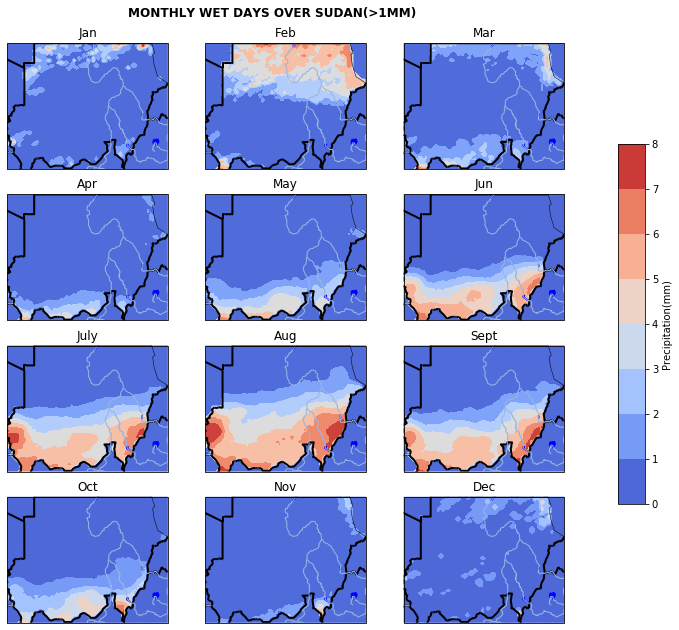

In [74]:
fig,ax=plt.subplots(4,3,figsize=(15,10),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    #ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([22.25,38.5,9.25,22.0], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_per_month1.lon,wet_days_per_month1.lat,wet_days_per_month1[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY WET DAYS OVER SUDAN(>1MM)', fontweight='bold');

In [75]:
dry_days_per_month2= (ds<1).groupby('datetime.month').sum(dim='datetime')
dry_days_per_month2

<xarray.DataArray 'precip' (month: 12, lat: 56, lon: 69)>
dask.array<stack, shape=(12, 56, 69), dtype=int64, chunksize=(1, 56, 69), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 21.75 22.0 22.25 22.5 22.75 ... 38.0 38.25 38.5 38.75
  * lat      (lat) float32 22.5 22.25 22.0 21.75 21.5 ... 9.75 9.5 9.25 9.0 8.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

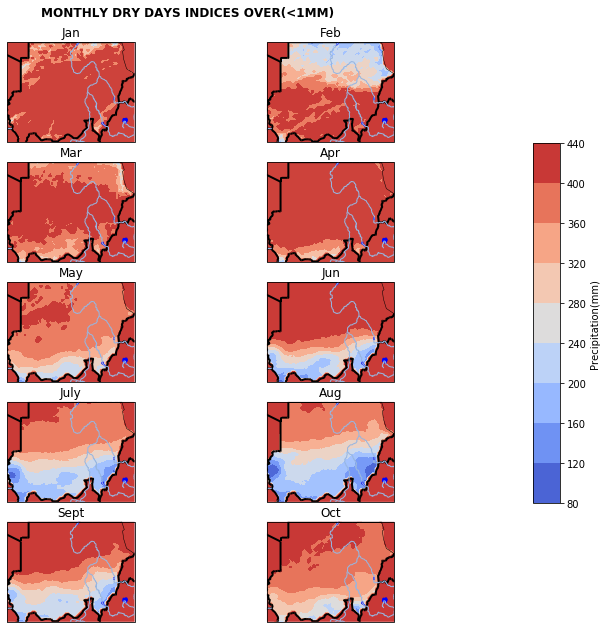

In [86]:
fig,ax=plt.subplots(5,2,figsize=(15,10),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([22.25,38.5,9.25,22.0], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(dry_days_per_month2.lon,dry_days_per_month2.lat,dry_days_per_month2[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY DRY DAYS INDICES OVER(<1MM)', fontweight='bold');

In [77]:
wet_days_per_year1 = (ws>10).groupby('datetime.year').sum(dim='datetime')
wet_days_per_year1

<xarray.DataArray 'precip' (year: 13, lat: 56, lon: 69)>
dask.array<stack, shape=(13, 56, 69), dtype=int64, chunksize=(1, 56, 69), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 21.75 22.0 22.25 22.5 22.75 ... 38.0 38.25 38.5 38.75
  * lat      (lat) float32 22.5 22.25 22.0 21.75 21.5 ... 9.75 9.5 9.25 9.0 8.75
  * year     (year) int64 2010 2011 2012 2013 2014 ... 2018 2019 2020 2021 2022

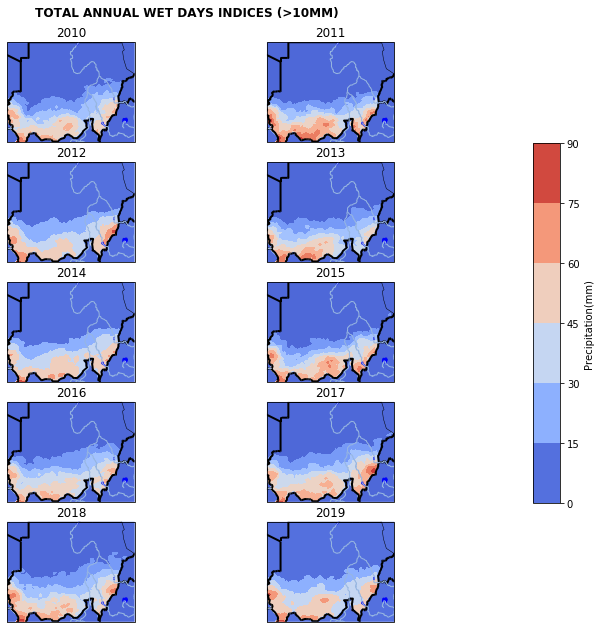

In [78]:
fig,ax=plt.subplots(5,2,figsize=(15,10),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([22.25,38.5,9.25,22.0], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_per_year1.lon,wet_days_per_year1.lat,wet_days_per_year1[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('TOTAL ANNUAL WET DAYS INDICES (>10MM)', fontweight='bold');

In [79]:
wet_days_per_year2 = (ws>20).groupby('datetime.year').sum(dim='datetime')
wet_days_per_year2

<xarray.DataArray 'precip' (year: 13, lat: 56, lon: 69)>
dask.array<stack, shape=(13, 56, 69), dtype=int64, chunksize=(1, 56, 69), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 21.75 22.0 22.25 22.5 22.75 ... 38.0 38.25 38.5 38.75
  * lat      (lat) float32 22.5 22.25 22.0 21.75 21.5 ... 9.75 9.5 9.25 9.0 8.75
  * year     (year) int64 2010 2011 2012 2013 2014 ... 2018 2019 2020 2021 2022

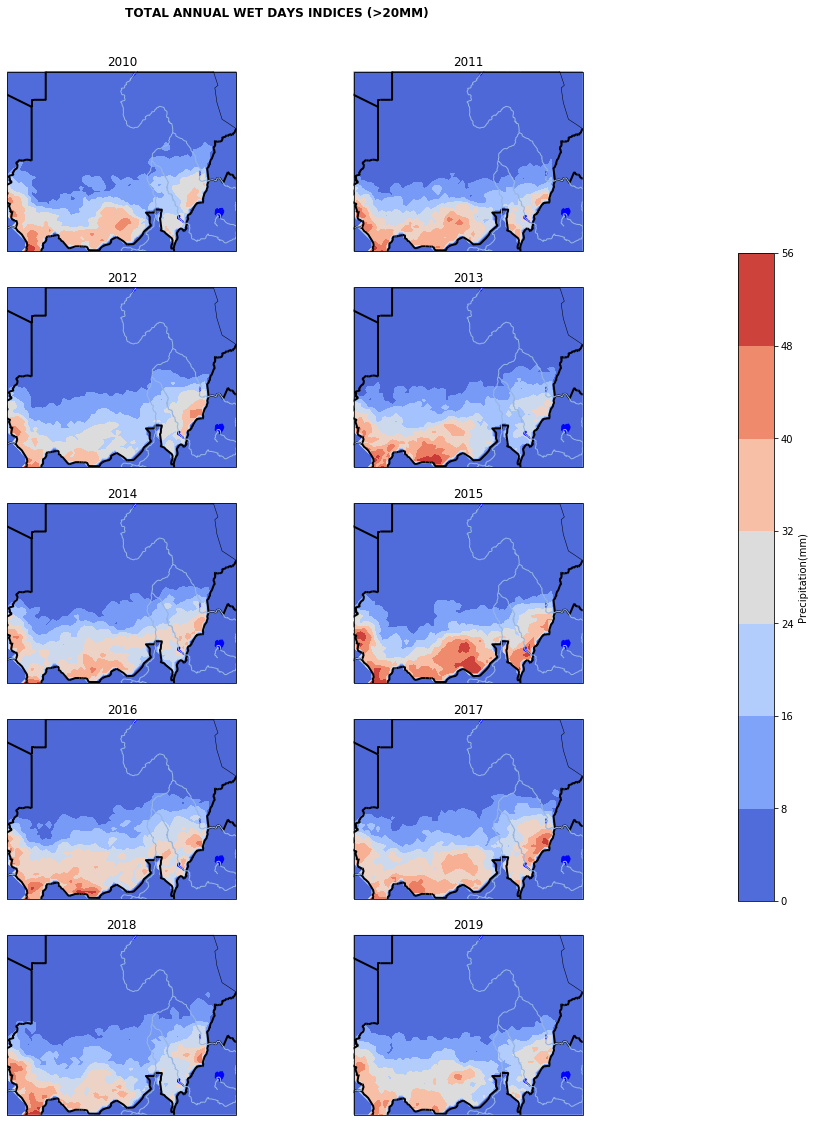

In [80]:
fig,ax=plt.subplots(5,2,figsize=(20,18),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([22.25,38.5,9.25,22.0], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_per_year2.lon,wet_days_per_year2.lat,wet_days_per_year2[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('TOTAL ANNUAL WET DAYS INDICES (>20MM)', fontweight='bold');

In [81]:
sudan_RR = xr.open_mfdataset('/home/linda/Desktop/Sudan/*.nc')
sudan_RR

<xarray.Dataset>
Dimensions:   (lon: 69, lat: 56, datetime: 4748)
Coordinates:
  * lon       (lon) float32 21.75 22.0 22.25 22.5 ... 38.0 38.25 38.5 38.75
  * lat       (lat) float32 22.5 22.25 22.0 21.75 21.5 ... 9.5 9.25 9.0 8.75
  * datetime  (datetime) datetime64[ns] 2010-01-01 2010-01-02 ... 2022-12-31
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime, lat, lon) float32 dask.array<chunksize=(365, 56, 69), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [82]:
dry_days_annual = (sudan_data['precip']< 1).resample(datetime='1Y').sum()
wet_days_annual = (sudan_data['precip']>=1).resample(datetime='1Y').sum()

In [83]:
dry_days_annual = (sudan_data['precip']< 1).resample(datetime='1Y').sum()
wet_days_annual = (sudan_data['precip']>=1).resample(datetime='1Y').sum()

In [84]:
dry_days_annual = (sudan_data['precip']< 1).resample(datetime='1Y').sum()
wet_days_annual = (sudan_data['precip']>=1).resample(datetime='1Y').sum()

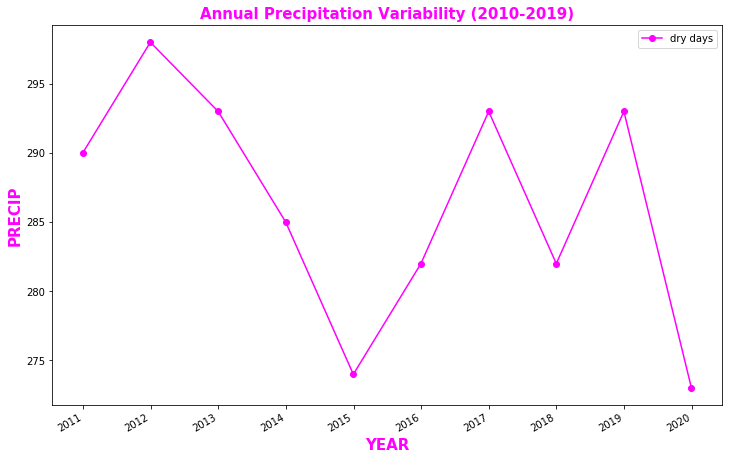

In [85]:
dry_days_annual = (sudan_data['precip']< 1).resample(datetime='1Y').sum()
fig, ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
dry_days_annual.plot(color = 'magenta', lw = 1.5, marker = 'o', markersize = '6',label='dry days')
ax.set_title('Annual Precipitation Variability (2010-2019)',fontweight = 'bold', fontsize = 15,color='magenta')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color='magenta')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 15,color='magenta')
plt.legend()
plt.show()

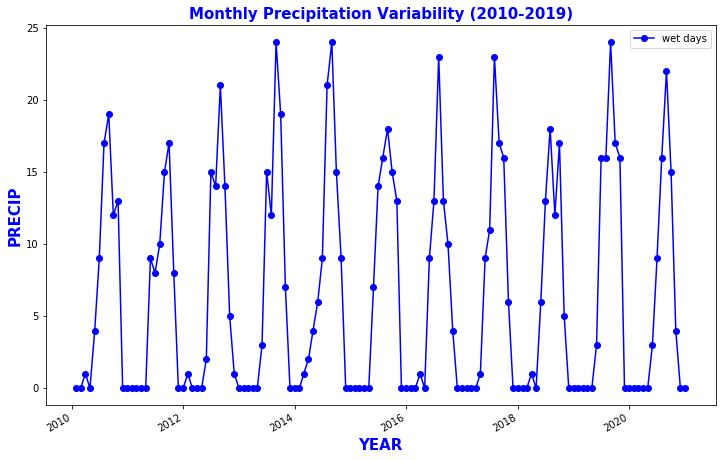

In [38]:
wet_days_monthly = (sudan_data['precip']>=1).resample(datetime='1M').sum()
fig, ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
wet_days_monthly.plot(color = 'blue', lw = 1.5, marker = 'o', markersize = '6',label='wet days')
ax.set_title('Monthly Precipitation Variability (2010-2019)',fontweight = 'bold', fontsize = 15,color='blue')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color='blue')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 15,color='blue')
plt.legend()
plt.show()

In [39]:
dry_days_annual = (sudan_data['precip']< 1).resample(datetime='1Y').sum()
wet_days_annual = (sudan_data['precip']>=1).resample(datetime='1Y').sum()

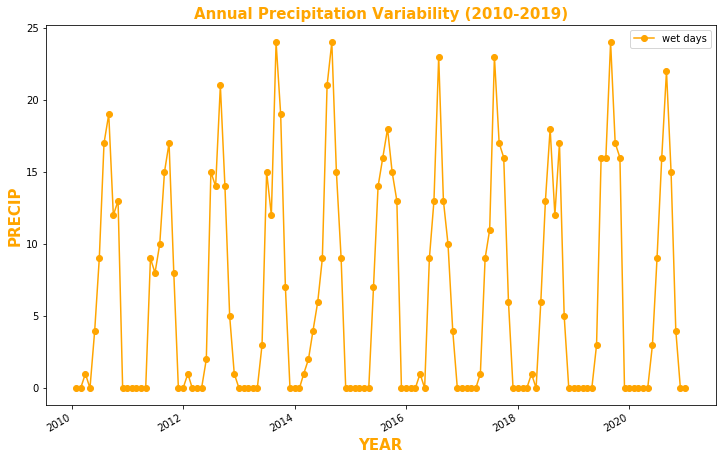

In [40]:
wet_days_annual = (sudan_data['precip']>=1).resample(datetime='1Y').sum()
fig, ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
wet_days_monthly.plot(color = 'orange', lw = 1.5, marker = 'o', markersize = '6',label='wet days')
ax.set_title('Annual Precipitation Variability (2010-2019)',fontweight = 'bold', fontsize = 15,color='orange')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color='orange')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 15,color='orange')
plt.legend()
plt.show()

In [41]:
extreme_10 = sudan_data.where(sudan_data > 10).groupby('datetime.year').count('datetime')
extreme_10

<xarray.Dataset>
Dimensions:  (year: 11)
Coordinates:
    lon      float32 30.75
    lat      float32 12.75
  * year     (year) int64 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
Data variables:
    crs      (year) int64 0 0 0 0 0 0 0 0 0 0 0
    precip   (year) int64 dask.array<chunksize=(1,), meta=np.ndarray>

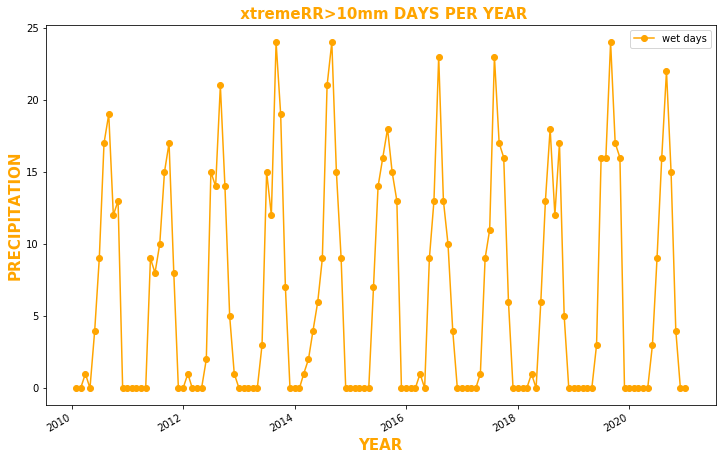

In [42]:
#plotting time series for xtremerr>10mm per year
extreme_10 = sudan_data.where(sudan_data > 10).groupby('datetime.year').count('datetime')
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
wet_days_monthly.plot(color = 'orange', lw = 1.5, marker = 'o', markersize = '6',label='wet days')
ax.set_title(' xtremeRR>10mm DAYS PER YEAR', fontweight = 'bold', fontsize=15 ,color = 'Orange')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 15, color= 'Orange')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15, color= 'Orange')
plt.legend()
# plt.show()
plt.show();

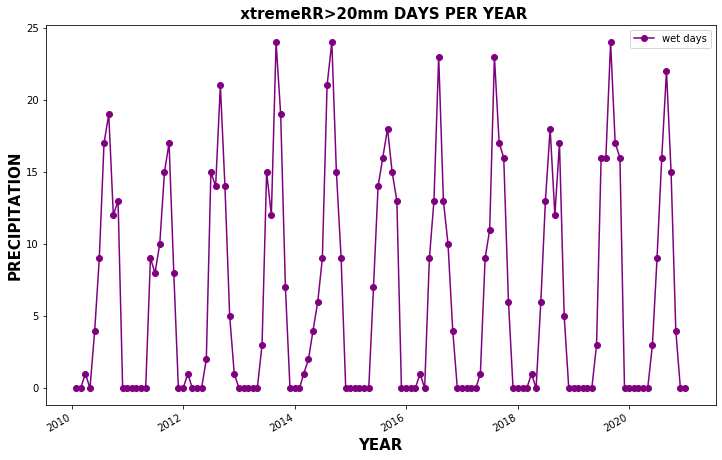

In [43]:
#plotting time series for xtremerr>20mm per year
extreme_10 = sudan_data.where(sudan_data > 10).groupby('datetime.year').count('datetime')
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
wet_days_monthly.plot(color = 'purple', lw = 1.5, marker = 'o', markersize = '6',label='wet days')
ax.set_title(' xtremeRR>20mm DAYS PER YEAR', fontweight = 'bold', fontsize=15 ,color = 'black')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 15, color= 'black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15, color= 'black')
plt.legend()
# plt.show()
plt.show();

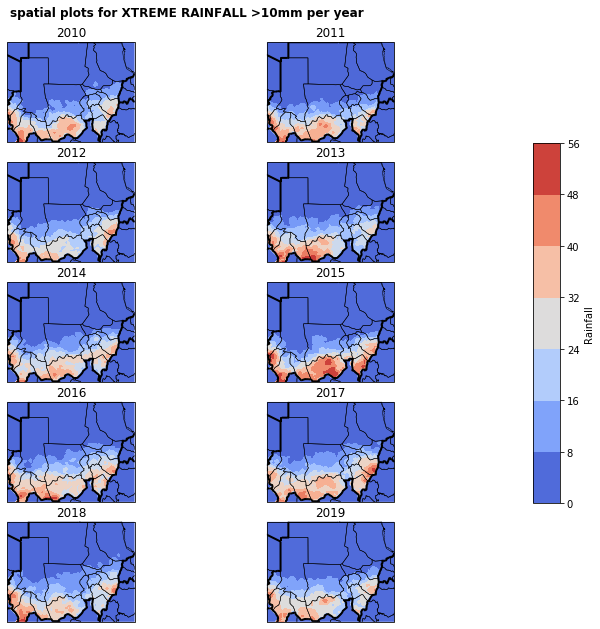

In [44]:
# spatial plots for XTREME RAINFALL >10mm per year
extreme_10 = sudan_data.where(sudan_data > 10).groupby('datetime.year').count('datetime')
fig,ax=plt.subplots(5,2,figsize=(15,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([22.25,38.5,9.25,22.0] ,crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_per_year2.lon, wet_days_per_year2.lat, wet_days_per_year2[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Rainfall')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for XTREME RAINFALL >10mm per year', fontweight='bold');
plt.savefig('16.jpeg');

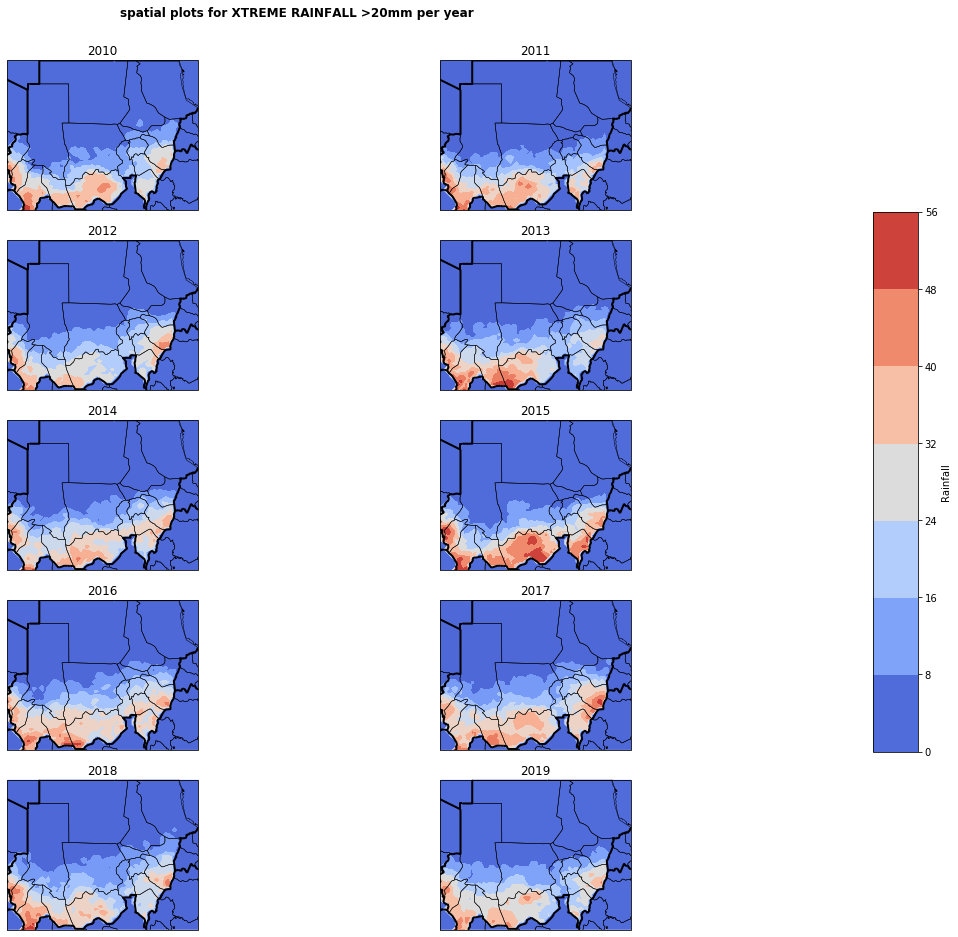

In [45]:
# spatial plots for XTREME RAINFALL >20mm per year
extreme_10 = sudan_data.where(sudan_data > 10).groupby('datetime.year').count('datetime')
fig,ax=plt.subplots(5,2,figsize=(25,15),subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([22.25,38.5,9.25,22.0] ,crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_per_year2.lon, wet_days_per_year2.lat, wet_days_per_year2[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Rainfall')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for XTREME RAINFALL >20mm per year', fontweight='bold');
plt.savefig('16.jpeg');

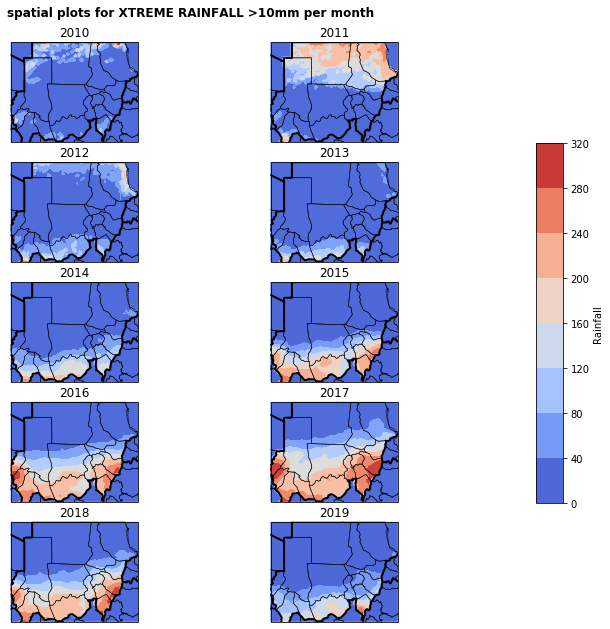

In [57]:
# spatial plots for XTREME RAINFALL >10mm per month
fig,ax=plt.subplots(5,2,figsize=(15,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([22.25,38.5,9.25,22.0] ,crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_per_month1.lon, wet_days_per_month1.lat, wet_days_per_month1[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Rainfall')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for XTREME RAINFALL >10mm per month', fontweight='bold');
plt.savefig('16.jpeg');

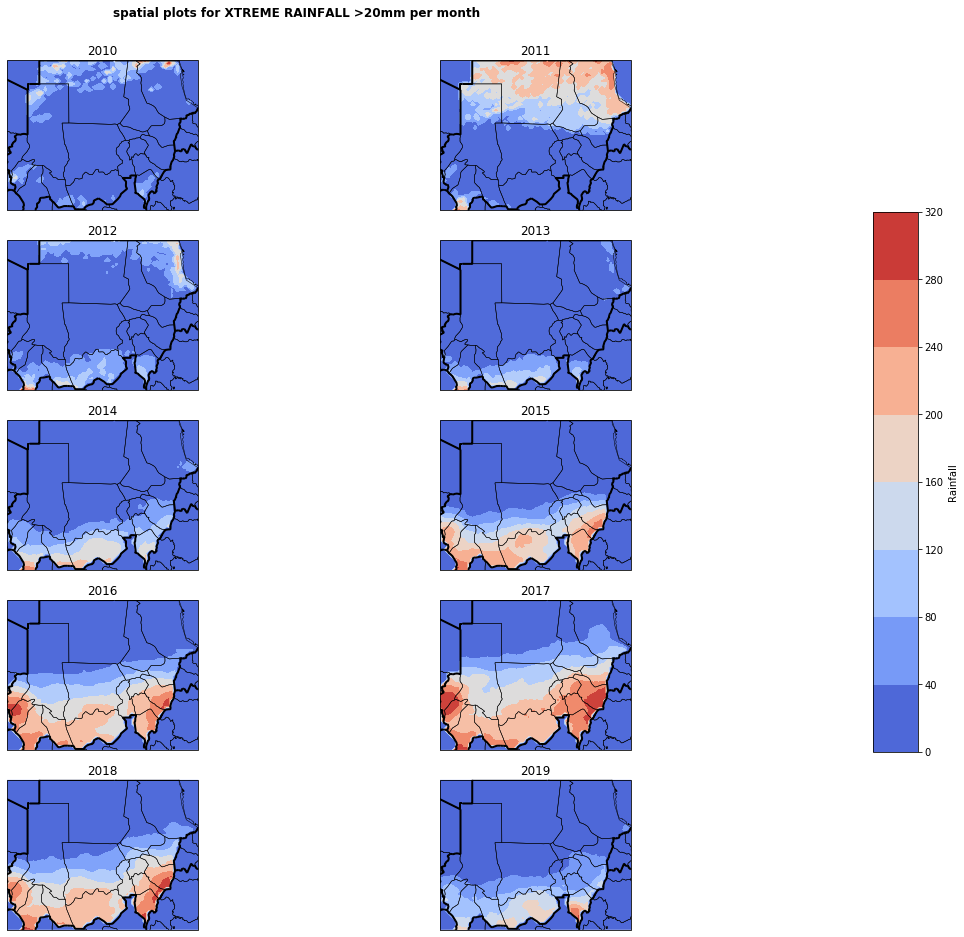

In [60]:
fig,ax=plt.subplots(5,2,figsize=(25,15),subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([22.25,38.5,9.25,22.0] ,crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_per_month1.lon, wet_days_per_month1.lat, wet_days_per_month1[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Rainfall')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for XTREME RAINFALL >20mm per month', fontweight='bold');
plt.savefig('16.jpeg');